In [1]:
import sys
path = "/mnt/d/kfm/Computation/"
if not path in sys.path:
    sys.path.insert(0, path)
from gnrcode import *
from sisl import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from itertools import combinations

In [3]:
g = geom.agnr(7)

In [30]:
def mark_sublattice(geo):
    N = geo.na
    xyz = geo.xyz
    idx_gen = combinations(np.arange(N),2)
    adj_max = np.zeros((N,N))
    for i1, i2 in idx_gen:
        if geo.rij(i1,i2) < 1.6:
            adj_max[i1,i2] = 1
            adj_max[i2,i1] = 1
    adj_max
    prev = {0}
    changed = {0}
    sublatLabel = [1]*N
    while len(changed) < N:
        tmp = set()
        for i in prev:
            nex = set(np.where(adj_max[i]==1)[0])
            nex = nex - changed
            for j in nex:
                sublatLabel[j] = -1*sublatLabel[i]
            tmp.update(nex)
        changed.update(tmp)
        prev = tmp
    sublatLabel = list(map(lambda x: 'A' if x==1 else 'B', sublatLabel))
    plt.scatter(xyz[:,0], xyz[:,1])
    for i in range(N):
        plt.text(xyz[i,0], xyz[i,1], sublatLabel[i], fontsize=20)
    plt.axis('equal')

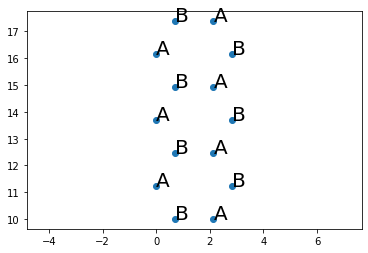

In [31]:
mark_sublattice(g)